In [2]:
import pandas as pd

##Carga de data set
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer = fetch_ucirepo(id=14) 
  
# data (as pandas dataframes) 
X = breast_cancer.data.features 
y = breast_cancer.data.targets 
  
# Convertir las features y targets en DataFrames
df_features = pd.DataFrame(data=X)
df_targets = pd.DataFrame(data=y)

# Concatenar las features y targets en un solo DataFrame
df_combined = pd.concat([df_features, df_targets], axis=1)

# Mostrar los primeros registros del DataFrame combinado
print("\nPrimeros registros del DataFrame combinado:")
print(df_combined.head(100))
print(df_combined.dtypes)



Primeros registros del DataFrame combinado:
      age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0   30-39   premeno      30-34       0-2        no          3   left   
1   40-49   premeno      20-24       0-2        no          2  right   
2   40-49   premeno      20-24       0-2        no          2   left   
3   60-69      ge40      15-19       0-2        no          2  right   
4   40-49   premeno        0-4       0-2        no          2  right   
..    ...       ...        ...       ...       ...        ...    ...   
95  40-49   premeno      30-34       0-2        no          2  right   
96  60-69      ge40      30-34       0-2        no          2   left   
97  60-69      ge40      15-19       0-2        no          2  right   
98  40-49   premeno      30-34       0-2        no          1   left   
99  30-39   premeno      25-29       0-2        no          2   left   

   breast-quad irradiat                 Class  
0     left_low       no  no-recurrence-eve

In [71]:
##Preprocesado 

formato_uniforme = all(df_combined[col].apply(type).nunique() == 1 for col in df_combined.columns)

#Compruebo nulos
print(df_combined.isnull().sum())

df_combined = df_combined.drop("Class", axis = 1)
#Sustituyo por NaN
df_combined['tumor-size'] = df_combined['tumor-size'].apply(lambda valor: valor if (len(valor.split('-')) == 2 and valor.split('-')[0].isdigit() and valor.split('-')[1].isdigit()) else pd.np.nan)
df_combined['inv-nodes'] = df_combined['inv-nodes'].apply(lambda valor: valor if (len(valor.split('-')) == 2 and valor.split('-')[0].isdigit() and valor.split('-')[1].isdigit()) else pd.np.nan)

## Selecciono columnas categoricas
categorical_columns = df_combined.select_dtypes(include=['category']).columns
print(categorical_columns)

df_combined = df_combined.apply(lambda x: x.astype('object') if x.dtype.name == 'category' else x, axis=0)
df_combined = df_combined.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x, axis=0)

## Selecciono columnas no categoricas
categorical_columns = df_combined.select_dtypes(include=['object']).columns
df_combined[categorical_columns] = df_combined[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))
print(categorical_columns)

#Preprocesado 2

# Transformar columnas con formato de rango a valores numéricos representativos
df_combined['age'] = df_combined['age'].apply(lambda x: int((int(x.split('-')[0]) + int(x.split('-')[1])) / 2) if '-' in x else int(x))
df_combined['tumor-size'] = df_combined['tumor-size'].apply(lambda x: int((int(x.split('-')[0]) + int(x.split('-')[1])) / 2) if '-' in x else int(x))
df_combined['inv-nodes'] = df_combined['inv-nodes'].apply(lambda x: int((int(x.split('-')[0]) + int(x.split('-')[1])) / 2) if '-' in x else int(x))

formato_uniforme = all(df_combined[col].apply(type).nunique() == 1 for col in df_combined.columns)

##Resumen
print(df_combined.isnull().sum())
print(df_combined.head()) 


age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64
Index([], dtype='object')
Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast',
       'breast-quad', 'irradiat'],
      dtype='object')
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64
   age menopause  tumor-size  inv-nodes node-caps  deg-malig breast  \
0   34   premeno          32          1        no          3   left   
1   44   premeno          22          1        no          2  right   
2   44   premeno          22          1        no          2   left   
3   64      ge40          17          1        no          2  right   
4   44   premeno           2          1        no          2  right   

  breast-quad irradiat  
0    left_low       no  
1    right_up 

C:\Users\CarlosZ\AppData\Local\Temp\ipykernel_4136\2195651076.py:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_combined['tumor-size'] = df_combined['tumor-size'].apply(lambda valor: valor if (len(valor.split('-')) == 2 and valor.split('-')[0].isdigit() and valor.split('-')[1].isdigit()) else pd.np.nan)
C:\Users\CarlosZ\AppData\Local\Temp\ipykernel_4136\2195651076.py:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_combined['inv-nodes'] = df_combined['inv-nodes'].apply(lambda valor: valor if (len(valor.split('-')) == 2 and valor.split('-')[0].isdigit() and valor.split('-')[1].isdigit()) else pd.np.nan)


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Visualizar las primeras filas del DataFrame
print("Antes del preprocesamiento:")
print(df_combined.head())

# Conversión de variables categóricas a numéricas utilizando Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['menopause', 'node-caps', 'breast', 'breast-quad', 'irradiat']

for column in categorical_columns:
    df_combined[column] = label_encoder.fit_transform(df_combined[column])

# Normalización de variables numéricas utilizando StandardScaler
numeric_columns = ['age', 'tumor-size', 'inv-nodes', 'deg-malig']

scaler = StandardScaler()
df_combined[numeric_columns] = scaler.fit_transform(df_combined[numeric_columns])

# Visualizar las primeras filas del DataFrame después del preprocesamiento
print("\nDespués del preprocesamiento:")
print(df_combined.head())

# División del dataset en entrenamiento y validación
train_data, validation_data = train_test_split(df_combined, test_size=0.2, random_state=42)
print(train_data)


tensor_X_train = torch.tensor(train_data.values, dtype=torch.float32)
tensor_X_val = torch.tensor(validation_data.values, dtype=torch.float32)


# Visualizar las dimensiones de los conjuntos de entrenamiento y validación
print("\nDimensiones de los conjuntos de entrenamiento y validación:")
print("Entrenamiento:", train_data.shape)
print("Validación:", validation_data.shape)


Antes del preprocesamiento:
   age menopause  tumor-size  inv-nodes node-caps  deg-malig breast  \
0   34   premeno          32          1        no          3   left   
1   44   premeno          22          1        no          2  right   
2   44   premeno          22          1        no          2   left   
3   64      ge40          17          1        no          2  right   
4   44   premeno           2          1        no          2  right   

  breast-quad irradiat  
0    left_low       no  
1    right_up       no  
2    left_low       no  
3     left_up       no  
4   right_low       no  

Después del preprocesamiento:
        age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0 -1.647779          2    0.360593  -0.155446          0   1.290564       0   
1 -0.657727          2   -0.736530  -0.155446          0  -0.066426       1   
2 -0.657727          2   -0.736530  -0.155446          0  -0.066426       0   
3  1.322377          0   -1.285092  -0.155446   

In [73]:
#Setup

import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import layers

In [74]:
## Sampler Modificado
import tensorflow as tf
from tensorflow.keras import layers

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def __init__(self, random_seed=None, **kwargs):
        super(Sampling, self).__init__(**kwargs)
        self.random_seed = random_seed

    def call(self, inputs):
        z_mean, z_log_var = inputs

        # Validación de dimensiones
        assert tf.keras.backend.int_shape(z_mean) == tf.keras.backend.int_shape(z_log_var), \
            "Shapes of z_mean and z_log_var must be the same"

        batch, dim = tf.shape(z_mean)[0], tf.shape(z_mean)[1]

        # Manejo de semilla aleatoria
        if self.random_seed is not None:
            tf.random.set_seed(self.random_seed)

        # Uso de tf.random.normal directamente en la operación de muestreo
        epsilon = tf.random.normal(shape=(batch, dim), dtype=z_mean.dtype)

        # Devolver la muestra estocástica utilizando la fórmula de reparametrización
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


In [75]:
## Encoder Modificado

from tensorflow import keras
from tensorflow.keras import layers

latent_dim = 5  

# Encoder para datos numéricos 
encoder_inputs = keras.Input(shape=(9,))  

# Capas densas con activación relu, batch normalization y regularización
x = layers.Dense(256, activation="relu")(encoder_inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)  # Regularización dropout para prevenir el overfitting
x = layers.Dense(128, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Capas adicionales para aumentar la complejidad
x = layers.Dense(32, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Capas para calcular la media y el logaritmo de la varianza
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

# Capa de muestreo
z = Sampling()([z_mean, z_log_var])

# Crear el modelo del encoder
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 9)]                  0         []                            
                                                                                                  
 dense_40 (Dense)            (None, 256)                  2560      ['input_11[0][0]']            
                                                                                                  
 batch_normalization_34 (Ba  (None, 256)                  1024      ['dense_40[0][0]']            
 tchNormalization)                                                                                
                                                                                                  
 dropout_16 (Dropout)        (None, 256)                  0         ['batch_normalization_34

In [76]:
##Modificado

from tensorflow.keras import layers

# Define the decoder for numerical data
def decoderFunc(latent_dim, num_features):
    # Input layer for the latent space
    latent_inputs = layers.Input(shape=(10,))

    # Dense layers for non-linear transformations
    x = layers.Dense(256, activation="relu")(latent_inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.BatchNormalization()(x)

    # Dense layer for the final reconstruction
    ##MODIFICAR
    decoder_outputs = layers.Dense(num_features, activation="linear")(x)

    ##Modificacion dato activacion
    

    # Create the decoder model
    decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
    
    return decoder

# Assuming you have defined 'latent_dim' and 'num_features' earlier
latent_dim = 5  # Change according to your desired latent dimensionality
num_features = 9  # Change according to the number of features in your numerical data

# Build the complex numeric decoder
decoder = decoderFunc(latent_dim, num_features)
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 10)]              0         
                                                                 
 dense_44 (Dense)            (None, 256)               2816      
                                                                 
 batch_normalization_38 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_45 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_39 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_46 (Dense)            (None, 64)                8256

In [ ]:
print(df.dtypes)
df_combined.hist()
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable')
plt.show()

Epoch 1/150, Loss: 84.4063, Reconstruction Loss: 1.3728, KL Loss: 83.0335
Epoch 2/150, Loss: 83.4911, Reconstruction Loss: 1.8679, KL Loss: 81.6231
Epoch 3/150, Loss: 72.6789, Reconstruction Loss: 1.7043, KL Loss: 70.9747
Epoch 4/150, Loss: 65.3323, Reconstruction Loss: 1.1997, KL Loss: 64.1326
Epoch 5/150, Loss: 53.0331, Reconstruction Loss: 1.3681, KL Loss: 51.6651
Epoch 6/150, Loss: 49.7811, Reconstruction Loss: 1.3734, KL Loss: 48.4077
Epoch 7/150, Loss: 38.8577, Reconstruction Loss: 1.3303, KL Loss: 37.5274
Epoch 8/150, Loss: 41.0700, Reconstruction Loss: 1.2924, KL Loss: 39.7776
Epoch 9/150, Loss: 34.2496, Reconstruction Loss: 1.2060, KL Loss: 33.0437
Epoch 10/150, Loss: 38.1299, Reconstruction Loss: 1.3194, KL Loss: 36.8104
Epoch 11/150, Loss: 32.4977, Reconstruction Loss: 1.4092, KL Loss: 31.0886
Epoch 12/150, Loss: 34.3974, Reconstruction Loss: 1.4812, KL Loss: 32.9162
Epoch 13/150, Loss: 26.7875, Reconstruction Loss: 1.2402, KL Loss: 25.5473
Epoch 14/150, Loss: 27.8342, Recon

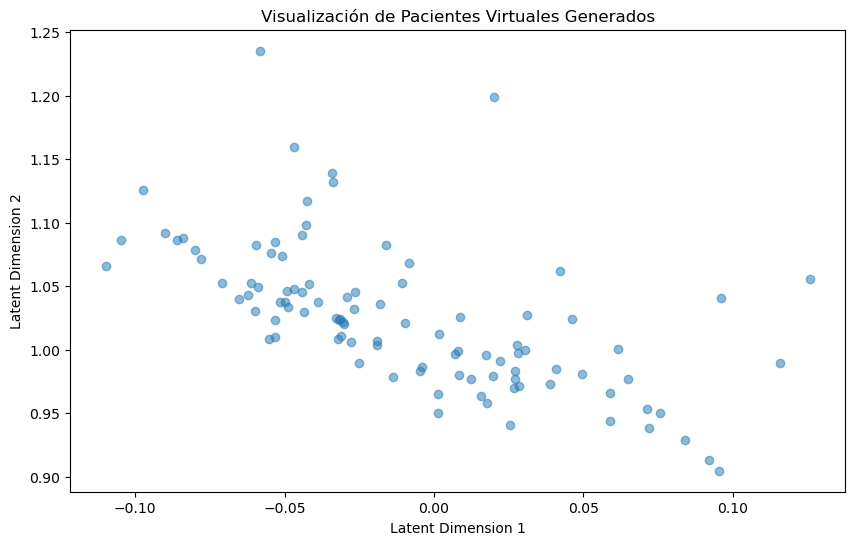

In [115]:
 ##Beno

import torch
from torch import Tensor
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = df_combined.values

# Parámetros
input_size = X.shape[1]
latent_size = 5  # Tamaño del espacio latente
batch_size = 64
epochs = 150

class VAE(nn.Module):
    def __init__(self, input_size, latent_size):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.5),
            nn.Linear(64, latent_size*2)  
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.5),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5),
            nn.Linear(256, input_size),
        )

        # Trackers de pérdida
        self.total_loss_tracker = []
        self.reconstruction_loss_tracker = []
        self.kl_loss_tracker = []

    def forward(self, x):
        # Encoder
        z_mean_log_var = self.encoder(x)
        z_mean, z_log_var = torch.chunk(z_mean_log_var, 2, dim=1)

        # Reparametrización
        epsilon = torch.randn_like(z_mean)
        z = z_mean + torch.exp(0.5 * z_log_var) * epsilon

        # Decoder
        reconstruction = self.decoder(z)

        return z_mean, z_log_var, z, reconstruction

# Instanciar el modelo VAE y el optimizador
vae = VAE(input_size, latent_size)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# División de datos en entrenamiento y validación
X_train = tensor_X_train.numpy()
#X_train, X_val = train_test_split(X.numpy(), test_size=0.2, random_state=42)
X_val = tensor_X_val.numpy()
# Normalizar los datos de entrenamiento y validación
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convertir de nuevo a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)

# Crear conjuntos de datos y dataloaders
train_dataset = TensorDataset(X_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Función de pérdida y entrenamiento
criterion = nn.MSELoss()
#criterion = nn.BCEWithLogitsLoss()


def train_step(model, data, optimizer):
    model.train()
    optimizer.zero_grad()

    data = data.squeeze(dim=1)
        
    z_mean, z_log_var, z, reconstruction = model(data)

    # Pérdida de reconstrucción usando error cuadrático medio
    reconstruction_loss = criterion(reconstruction, data)

    # Pérdida KL
    kl_loss = -0.5 * torch.sum(1 + z_log_var - z_mean.pow(2) - z_log_var.exp())

    # Pérdida total
    total_loss = reconstruction_loss + kl_loss

    total_loss.backward()
    optimizer.step()

    return total_loss.item(), reconstruction_loss.item(), kl_loss.item()

 #Entrenamiento bueno
for epoch in range(epochs):
    for batch in train_dataloader:
        data = batch[0]
        loss, reconstruction_loss, kl_loss = train_step(vae, data, optimizer)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Reconstruction Loss: {reconstruction_loss:.4f}, KL Loss: {kl_loss:.4f}')


# Entrenamiento
###for epoch in range(epochs):
#    for batch in train_dataloader:
#        data = batch[0]
#        loss, reconstruction_loss, kl_loss = train_step(vae, data, optimizer)

#    vae.total_loss_tracker.append(loss)
#    vae.reconstruction_loss_tracker.append(reconstruction_loss)
#    vae.kl_loss_tracker.append(kl_loss)

#    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Reconstruction Loss: {reconstruction_loss:.4f}, KL Loss: {kl_loss:.4f}')

# Generación de pacientes virtuales
vae.eval()
with torch.no_grad():
    # Muestreo aleatorio desde el espacio latente
    latent_samples = torch.randn(100, latent_size)
    generated_data = vae.decoder(latent_samples).numpy()

    generated_data = scaler.inverse_transform(generated_data)


    # Crear DataFrame con datos generados
generated_df = pd.DataFrame(data=generated_data, columns=df_combined.columns)  
print("Pacientes virtuales generados:")
print(generated_df.head(10))

# Visualización de pacientes virtuales generados
plt.figure(figsize=(10, 6))
plt.scatter(generated_data[:, 0], generated_data[:, 1], alpha=0.5)
plt.title('Visualización de Pacientes Virtuales Generados')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convertir el DataFrame a tensores de PyTorch
X = df_combined.values  
X = torch.tensor(X, dtype=torch.float32)

# Parámetros
input_size = X.shape[1]
latent_size = 10
batch_size = 64
epochs = 100

class VAE(nn.Module):
    def __init__(self, input_size, latent_size):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.5),
            nn.Linear(64, latent_size * 2)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.5),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5),
            nn.Linear(256, input_size),
            nn.ReLU()  # Sigmoid para datos en el rango [0, 1]
        )

        # Trackers de pérdida
        self.total_loss_tracker = []
        self.reconstruction_loss_tracker = []
        self.kl_loss_tracker = []

    def forward(self, x):
        # Encoder
        z_mean_log_var = self.encoder(x)
        z_mean, z_log_var = torch.chunk(z_mean_log_var, 2, dim=1)

        # Reparametrización
        epsilon = torch.randn_like(z_mean)
        z = z_mean + torch.exp(0.5 * z_log_var) * epsilon

        # Decoder
        reconstruction = self.decoder(z)

        return z_mean, z_log_var, z, reconstruction

# Instanciar el modelo VAE y el optimizador
vae = VAE(input_size, latent_size)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# División de datos en entrenamiento y validación
X_train, X_val = train_test_split(X.numpy(), test_size=0.2, random_state=42)

# Normalizar los datos de entrenamiento y validación
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convertir de nuevo a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)

# Crear conjuntos de datos y dataloaders
train_dataset = TensorDataset(X_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Función de pérdida y entrenamiento
criterion = nn.MSELoss()

def train_step(model, data, optimizer):
    model.train()
    optimizer.zero_grad()

    z_mean, z_log_var, z, reconstruction = model(data)

    # Pérdida de reconstrucción usando error cuadrático medio
    reconstruction_loss = criterion(data, reconstruction)

    # Pérdida KL
    kl_loss = -0.5 * torch.sum(1 + z_log_var - z_mean.pow(2) - z_log_var.exp())

    # Pérdida total
    total_loss = reconstruction_loss + kl_loss

    total_loss.backward()
    optimizer.step()

    return total_loss.item(), reconstruction_loss.item(), kl_loss.item()

# Entrenamiento
for epoch in range(epochs):
    for batch in train_dataloader:
        data = batch[0]
        loss, reconstruction_loss, kl_loss = train_step(vae, data, optimizer)

    vae.total_loss_tracker.append(loss)
    vae.reconstruction_loss_tracker.append(reconstruction_loss)
    vae.kl_loss_tracker.append(kl_loss)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Reconstruction Loss: {reconstruction_loss:.4f}, KL Loss: {kl_loss:.4f}')

# Generación de pacientes virtuales
vae.eval()
with torch.no_grad():
    # Muestreo aleatorio desde el espacio latente
    latent_samples = torch.randn(100, latent_size)
    generated_data = vae.decoder(latent_samples).numpy()

    # Crear DataFrame con datos generados
    generated_columns = [f'latent_dim_{i+1}' for i in range(latent_size)]
    generated_df = pd.DataFrame(data=generated_data, columns=generated_columns)
    print("Pacientes virtuales generados:")
    print(generated_df.head())

# Visualización de pacientes virtuales generados
plt.figure(figsize=(10, 6))
plt.scatter(generated_data[:, 0], generated_data[:, 1], alpha=0.5)
plt.title('Visualización de Pacientes Virtuales Generados')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()


In [ ]:
## Modificado
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convertir el DataFrame a tensores de PyTorch
X = df_combined.values  
X = torch.tensor(X, dtype=torch.float32)

# Parámetros
input_size = X.shape[1]
latent_size = 5 #5  # Tamaño del espacio latente
batch_size = 64
epochs = 100 #50

class VAE(keras.Model):
    def __init__(self, input_size, latent_size):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = keras.Sequential([
            layers.InputLayer(input_shape=(9,)),
            layers.Dense(256, activation="relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),  # Regularización dropout
            layers.Dense(128, activation="relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(64, activation="relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(latent_dim * 1)  
        ])

        # Decoder
        self.decoder = keras.Sequential([
            layers.InputLayer(input_shape=(latent_dim,)),
            layers.Dense(64, activation="relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(128, activation="relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(256, activation="relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(10, activation="relu")  
        ])

        # Trackers de pérdida
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]
# Instanciar el modelo VAE y el optimizador
vae = VAE(input_size, latent_size)
optimizer = optim.Adam(list(vae.trainable_weights), lr=1e-3)


# División de datos en entrenamiento y validación
X_train, X_val = train_test_split(X.numpy(), test_size=0.2, random_state=42)

# Normalizar los datos de entrenamiento y validación
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convertir de nuevo a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)

 # Crear conjuntos de datos y dataloaders
train_dataset = TensorDataset(X_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var = tf.split(self.encoder(data), 2, axis=-1)
            z = self.encoder(data)
            reconstruction = self.decoder(z)

            # Pérdida de reconstrucción usando error cuadrático medio
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.mean_squared_error(data, reconstruction),
                    axis=1,
                )
            )

            # Pérdida KL
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))

            # Pérdida total
            total_loss = reconstruction_loss + kl_loss

# Cálculo y aplicación de gradientes
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        # Actualización de los trackers de pérdida
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

        # Generación de pacientes virtuales
vae.eval()
with torch.no_grad():
# Muestreo aleatorio desde el espacio latente
    latent_samples = torch.randn(100, latent_size)
    generated_data = vae.decode(latent_samples).numpy()

    # Crear DataFrame con datos generados
generated_df = pd.DataFrame(data=generated_data, columns=df_combined.columns)  # Excluir la columna 'Class'
print("Pacientes virtuales generados:")
print(generated_df.head())

    # Visualización de pacientes virtuales generados
plt.figure(figsize=(10, 6))
plt.scatter(generated_data[:, 0], generated_data[:, 1], alpha=0.5)
plt.title('Visualización de Pacientes Virtuales Generados')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()

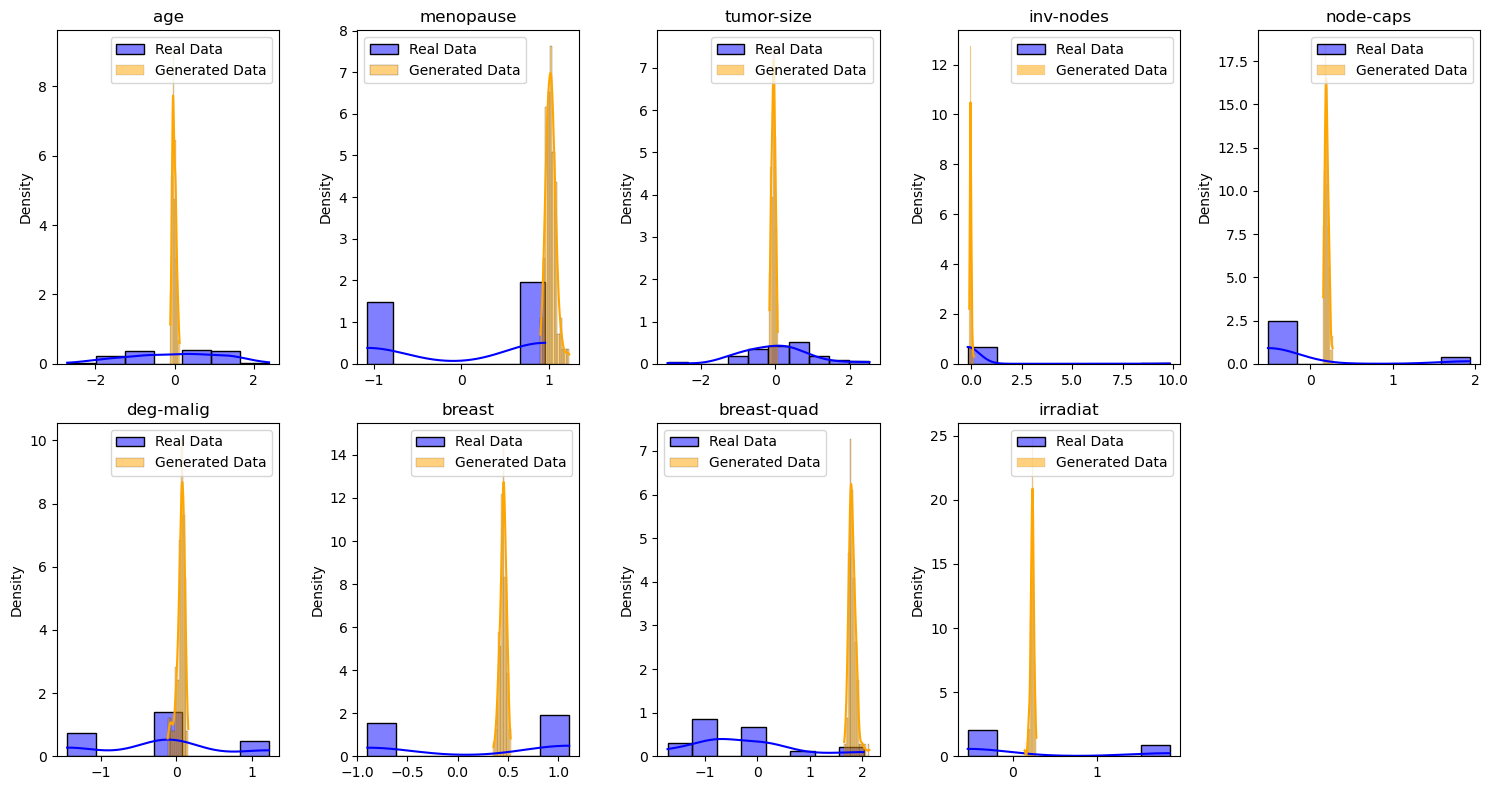

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00        58

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [116]:
# Importar las bibliotecas necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Importar NumPy para manipulación de arreglos

# Función para comparar distribuciones marginales
def compare_marginal_distributions(real_data, generated_data, feature_names):
    # Crear subgráficos para cada covariable
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
    
    # Iterar sobre las covariables
    for i, ax in enumerate(axes.flatten()):
        # Verificar si hay más covariables a mostrar
        if i < len(feature_names):
            # Visualizar histogramas y densidades para pacientes reales y virtuales
            sns.histplot(real_data[:, i], kde=True, color='blue', ax=ax, label='Real Data', stat='density')
            sns.histplot(generated_data[:, i], kde=True, color='orange', ax=ax, label='Generated Data', stat='density')
            ax.set_title(feature_names[i])  # Establecer el título de la covariable
            ax.legend()  # Mostrar leyenda

        else:
            # Si no hay más covariables, desactivar los subgráficos restantes
            ax.axis('off')

    plt.tight_layout()  # Ajustar diseño
    plt.show()  # Mostrar gráficos

# Función para validar usando un clasificador
def validate_with_classifier(real_data, generated_data):
    # Combina los datos reales y virtuales
    X = np.vstack([real_data, generated_data])
    
    # Etiquetas para clasificación (1 para real, 0 para virtual)
    y = np.concatenate([np.ones(len(real_data)), np.zeros(len(generated_data))])

    # Entrenar un clasificador (Random Forest en este caso)
    classifier = RandomForestClassifier(n_estimators=50, random_state=42)
    classifier.fit(X, y)

    # Hacer predicciones y calcular métricas
    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred)

    print(f'Accuracy: {accuracy}')
    print('\nClassification Report:\n', report)

# Validar distribuciones marginales
compare_marginal_distributions(X_val.numpy(), generated_df.values, generated_df.columns)
plt.show()  # Mostrar gráficos de distribuciones marginales

# Validar usando un clasificador
validate_with_classifier(X_val.numpy(), generated_df.values)


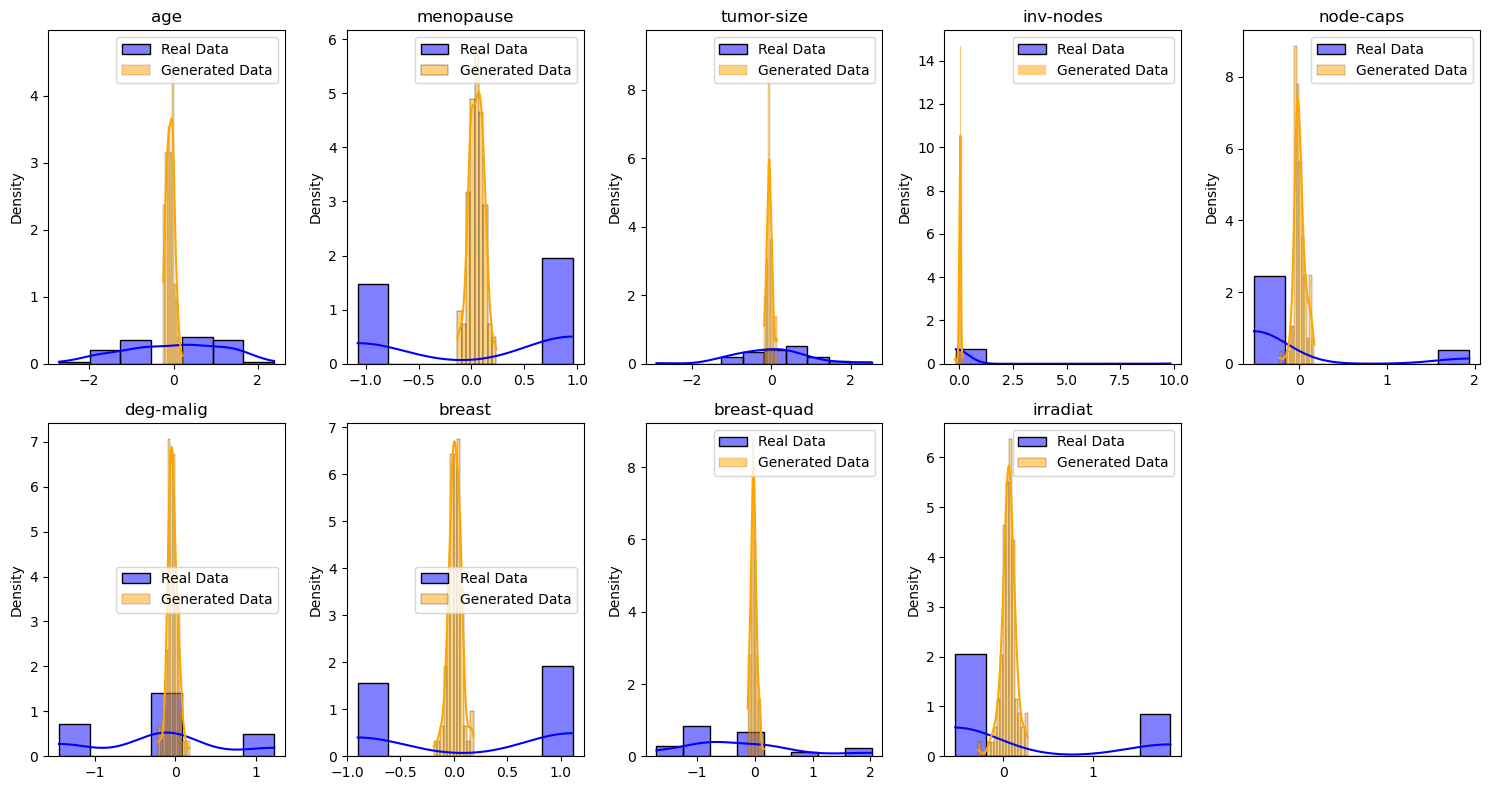

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00        58

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Función para comparar distribuciones marginales
def compare_marginal_distributions(real_data, generated_data, feature_names):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
    for i, ax in enumerate(axes.flatten()):
        if i < len(feature_names):
            sns.histplot(real_data[:, i], kde=True, color='blue', ax=ax, label='Real Data', stat='density')
            sns.histplot(generated_data[:, i], kde=True, color='orange', ax=ax, label='Generated Data', stat='density')
            ax.set_title(feature_names[i])
            ax.legend()
        else:
            # Si no hay más características, desactiva los subgráficos restantes
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Función para validar usando un clasificador
def validate_with_classifier(real_data, generated_data):
    X = np.vstack([real_data, generated_data])
    y = np.concatenate([np.ones(len(real_data)), np.zeros(len(generated_data))])

    # Entrenar un clasificador (Random Forest en este caso)
    classifier = RandomForestClassifier(n_estimators=50, random_state=42)  # Puedes reducir el número de estimadores

 #    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X, y)

    # Hacer predicciones y calcular métricas
    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred)

    print(f'Accuracy: {accuracy}')
    print('\nClassification Report:\n', report)

# Validar distribuciones marginales
compare_marginal_distributions(X_val.numpy(), generated_df.values, generated_df.columns)
plt.show()

# Validar usando un clasificador
validate_with_classifier(X_val.numpy(), generated_df.values)

In [86]:
# Importar bibliotecas necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Función para validar usando un clasificador con distribución conjunta
def validate_with_joint_distribution(real_data, generated_data):
    # Etiquetas para clasificación (1 para real, 0 para virtual)
    y_real = np.ones(len(real_data))
    y_generated = np.zeros(len(generated_data))

    # Combinar datos reales y virtuales
    X = np.vstack([real_data, generated_data])
    y = np.concatenate([y_real, y_generated])

    # Entrenar un clasificador (Random Forest en este caso)
    classifier = RandomForestClassifier(n_estimators=50, random_state=42)
    classifier.fit(X, y)

    # Hacer predicciones y calcular métricas
    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred)

    print(f'Accuracy: {accuracy}')
    print('\nClassification Report:\n', report)

# Validar con distribución conjunta
validate_with_joint_distribution(X_val.numpy(), generated_df.values)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00        58

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [117]:
# Comparación de estadísticas descriptivas
real_stats = pd.DataFrame(df_combined.describe())
generated_stats = pd.DataFrame(generated_df.describe())

# Imprimir las estadísticas descriptivas
print("Estadísticas Descriptivas para Pacientes Reales:")
print(real_stats)

print("\nEstadísticas Descriptivas para Pacientes Virtuales:")
print(generated_stats)


Estadísticas Descriptivas para Pacientes Reales:
                age   menopause  tumor-size     inv-nodes   node-caps  \
count  2.860000e+02  286.000000  286.000000  2.860000e+02  286.000000   
mean  -3.353960e-16    1.073427    0.000000  7.453245e-17    0.195804   
std    1.001753e+00    0.986680    1.001753  1.001753e+00    0.397514   
min   -2.637831e+00    0.000000   -2.930776 -1.554456e-01    0.000000   
25%   -6.577269e-01    0.000000   -0.736530 -1.554456e-01    0.000000   
50%    3.323252e-01    2.000000    0.360593 -1.554456e-01    0.000000   
75%    3.323252e-01    2.000000    0.360593 -1.554456e-01    0.000000   
max    2.312429e+00    2.000000    2.554839  9.204013e+00    1.000000   

          deg-malig      breast  breast-quad    irradiat  
count  2.860000e+02  286.000000   286.000000  286.000000  
mean   2.484415e-16    0.468531     1.779720    0.237762  
std    1.001753e+00    0.499883     1.087605    0.426459  
min   -1.423416e+00    0.000000     0.000000    0.000000 

In [118]:
from scipy.stats import mannwhitneyu

# Función para realizar la prueba de Mann-Whitney para cada covariable
def compare_distributions_mann_whitney(real_data, generated_data, feature_names):
    for i, feature in enumerate(feature_names):
        # Aplicar la prueba de Mann-Whitney para la covariable actual
        stat, p_value = mannwhitneyu(real_data[:, i], generated_data[:, i], alternative='two-sided')
        
        # Imprimir resultados
        print(f'\nPrueba de Mann-Whitney para {feature}:')
        print(f'Estadística de la prueba U: {stat}')
        print(f'Valor p: {p_value}')

        # Interpretación del valor p
        if p_value < 0.05:
            print('Resultado: Diferencia significativa entre las distribuciones.\n')
        else:
            print('Resultado: No hay diferencia significativa entre las distribuciones.\n')

# Comparar distribuciones usando la prueba de Mann-Whitney
compare_distributions_mann_whitney(X_val.numpy(), generated_df.values, generated_df.columns)



Prueba de Mann-Whitney para age:
Estadística de la prueba U: 3300.0
Valor p: 0.14891870148365305
Resultado: No hay diferencia significativa entre las distribuciones.


Prueba de Mann-Whitney para menopause:
Estadística de la prueba U: 330.0
Valor p: 1.05886019528479e-20
Resultado: Diferencia significativa entre las distribuciones.


Prueba de Mann-Whitney para tumor-size:
Estadística de la prueba U: 2700.0
Valor p: 0.47128994682795033
Resultado: No hay diferencia significativa entre las distribuciones.


Prueba de Mann-Whitney para inv-nodes:
Estadística de la prueba U: 100.0
Valor p: 4.444641763330617e-25
Resultado: Diferencia significativa entre las distribuciones.


Prueba de Mann-Whitney para node-caps:
Estadística de la prueba U: 800.0
Valor p: 1.394598739484956e-14
Resultado: Diferencia significativa entre las distribuciones.


Prueba de Mann-Whitney para deg-malig:
Estadística de la prueba U: 1131.0
Valor p: 1.4736881423164126e-10
Resultado: Diferencia significativa entre las d

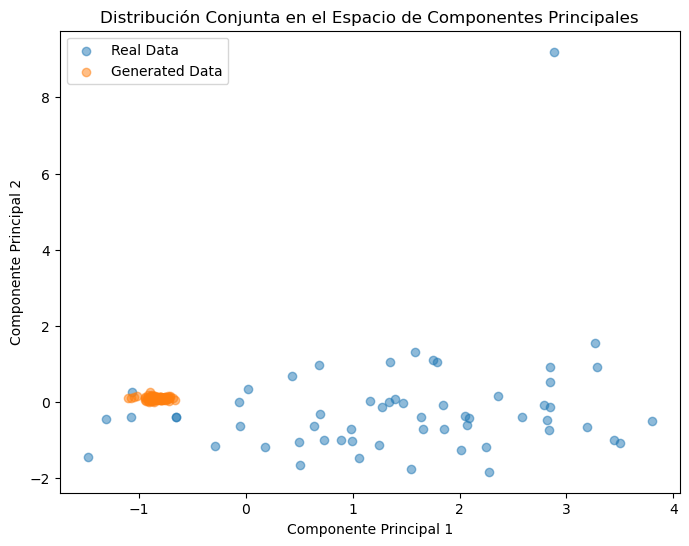

In [119]:
import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Función para realizar PCA y visualizar la distribución conjunta en un espacio de menor dimensión
def visualize_pca(real_data, generated_data):
    # Convertir tensores a arrays de NumPy
    real_array = real_data.numpy()
    generated_array = generated_data.to_numpy()

    # Combinar datos reales y virtuales
    combined_data = np.vstack([real_array, generated_array])

    # Aplicar PCA
    pca = PCA(n_components=9)  # Elegir el número de componentes principales deseados
    principal_components = pca.fit_transform(combined_data)

    # Visualizar distribución conjunta en el espacio de componentes principales
    plt.figure(figsize=(8, 6))
    plt.scatter(principal_components[:len(real_array), 0], principal_components[:len(real_array), 1], label='Real Data', alpha=0.5)
    plt.scatter(principal_components[len(real_array):, 0], principal_components[len(real_array):, 1], label='Generated Data', alpha=0.5)
    plt.title('Distribución Conjunta en el Espacio de Componentes Principales')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.show()

# Aplicar PCA y visualizar distribución conjunta
visualize_pca(X_val, generated_df)


In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import make_scorer, accuracy_score


# Función para validar usando un clasificador con validación cruzada
def validate_with_cross_validation(real_data, generated_data):
    # Combina los datos reales y virtuales
    X = np.vstack([real_data, generated_data])
    y = np.concatenate([np.ones(len(real_data)), np.zeros(len(generated_data))])

    # Entrenar un clasificador (Random Forest en este caso)
    classifier = RandomForestClassifier(n_estimators=50, random_state=42)

    # Realizar validación cruzada y calcular métricas
    scoring = {'accuracy': make_scorer(accuracy_score)}
    cv_results = cross_validate(classifier, X, y, cv=5, scoring=scoring)

    # Imprimir resultados de validación cruzada
    print("Resultados de Validación Cruzada:")
    print(f'Accuracy: {np.mean(cv_results["test_accuracy"]):.2f} +/- {np.std(cv_results["test_accuracy"]):.2f}')

# Validar usando un clasificador con validación cruzada
validate_with_cross_validation(X_val.numpy(), generated_df.values)


Resultados de Validación Cruzada:
Accuracy: 1.00 +/- 0.00
